In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Tester():
    # 本类用于图像测试，提供正确数、已测试数、错误索引列表、错误预测值列表、
    # 错误对应字典供外部使用，同时train函数要传入模型、测试集、过程打印次数（默认6）
    
    def __init__(self):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.eval()
        self.eval_acc = 0
        self.tested_num = 0
        self.error_list=[]
        self.wrong_pred=[]
        self.wrong_dict={}
        self.loss_list=[]
        self.acc_list=[]
        
    def test(self, model, test_loader, print_interval=6):
        for num, data in enumerate(test_loader): 
            img, label = data
            label = label.long().to(device)   # load the testing data
            img = img.to(device)

            out = model(img)
            loss = model.criterion(out, label)  # forward

            _, pred = torch.max(out ,1)   # get the results

            # the wrong-predicted number
            self.wrong_pred.extend([pred[i].data.item() for i in range(len(pred)) if pred[i]!=label[i]])
            # the index of the wrong prediction
            self.error_list.extend([ i+self.tested_num for i in range(len(pred)) if pred[i]!=label[i] ])
            self.loss_list.extend([loss.data.item()])
           
            num_correct = (pred == label).sum()    # count the correct numbers
            self.tested_num += label.cpu().numpy().size  # count the tested numbers
            self.eval_acc += num_correct.data.item()    # calculate the accuracy
            self.acc_list.extend([self.eval_acc/ self.tested_num])
            
            if( num % int(len(test_loader.dataset)/((print_interval-1)*test_loader.batch_size)) == 0 ):
                print('tested: {}/{}'.format(self.tested_num, len(test_loader.dataset)))
                print('loss is {} '.format(loss.data.item()))
                print('acc is {} '.format(self.eval_acc/ self.tested_num))
                print('')
        
        self.wrong_dict = dict(zip(self.error_list, self.wrong_pred))
        print("Total acc is {}".format(self.eval_acc/ self.tested_num))
        
    def print_error_list(self):
        print(self.error_list)
        
    def print_wrong_pred(self):
        print(self.wrong_pred)
        
    def loss(self):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(self.loss_list)), self.loss_list, 'bo')
        plt.grid(True)
        plt.title("Convergence of Loss Function")
        plt.xlabel("Iteration number")
        plt.ylabel("Cost function")
        # dummy = plt.xlim([-0.05*epoch,1.05*epoch])
        # dummy = plt.ylim([7,45])
        
    def accuracy(self):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(self.acc_list)), self.acc_list, 'ro')
        plt.grid(True)
        plt.title("Distribution of Accuracy")
        plt.xlabel("Iteration number")
        plt.ylabel("Accuracy")
        # dummy = plt.xlim([-0.05*epoch,1.05*epoch])
        # dummy = plt.ylim([7,45])


In [46]:
class Trainer():
    # 本类用于图像测试，提供正确数、已测试数、错误索引列表、错误预测值列表、
    # 错误对应字典供外部使用，同时train函数要传入模型、测试集、过程打印次数（默认6）
    
    def __init__(self):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.train()
        self.eval_acc = 0
        self.trained_num = 0
        self.loss_list=[]
        self.acc_list=[]
        
    def train(self, model, train_loader, epochs=1, print_interval=6):
        for e in range(epochs):
            self.trained_num=0
            self.eval_acc=0
            print('epoch: {}'.format(e+1))
            for num, data in enumerate(train_loader): 
                img, label = data
                label = label.long().to(device)   # load the testing data
                img = img.to(device)

                out = model(img)
                loss = model.criterion(out, label)  # forward
                
                model.optimizer.zero_grad()
                loss.backward()
                model.optimizer.step()    # backward

                _, pred = torch.max(out ,1)   # get the results

                num_correct = (pred == label).sum()    # count the correct numbers
                self.trained_num += label.cpu().numpy().size  # count the tested numbers
                self.eval_acc += num_correct.data.item()    # calculate the accuracy
                self.acc_list.extend([self.eval_acc/ self.trained_num])
                self.loss_list.extend([loss.data.item()])

                if( num % int(len(train_loader.dataset)/((print_interval-1)*train_loader.batch_size)) == 0 ):
                    print('trained: {}/{}'.format(self.trained_num, len(train_loader.dataset)))
                    print('loss is {} '.format(loss.data.item()))
                    print('acc is {} '.format(self.eval_acc/ self.trained_num))
                    print('')
            
            print("Total acc is {}".format(self.eval_acc/ self.trained_num))
   
    def loss(self):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(self.loss_list)), self.loss_list, 'bo')
        plt.grid(True)
        plt.title("Convergence of Loss Function")
        plt.xlabel("Iteration number")
        plt.ylabel("Cost function")
        # dummy = plt.xlim([-0.05*epoch,1.05*epoch])
        # dummy = plt.ylim([7,45])
        
    def accuracy(self):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(self.acc_list)), self.acc_list, 'ro')
        plt.grid(True)
        plt.title("Distribution of Accuracy")
        plt.xlabel("Iteration number")
        plt.ylabel("Accuracy")
        # dummy = plt.xlim([-0.05*epoch,1.05*epoch])
        # dummy = plt.ylim([7,45])
        
    def save(self, file_name='./model_state1.pth'):
        torch.save(model.state_dict(), file_name)


In [47]:
class CNN( nn.Module ):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size = 3),  # 26*26*16
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size = 3),  # 24*24*32
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)) # 12*12*32
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size = 3),  # 10*10*64
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = 3),  # 8*8*128
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))  # 4*4*128
            
        self.fc = nn.Sequential(
            nn.Linear(128*4*4, 1024),
            nn.ReLU(inplace = True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace = True),
            nn.Linear(128, 10))
        
    def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = self.layer3(x)
            x = self.layer4(x)
            x = x.view(x.size(0), -1)  # 每个批次中的每一个输入都拉成一个维度，这样N个输入就有N*（32*7*7）的输出即N*1568
            x = self.fc(x)
            return x
    def set_criterion(self, criterion):
        self.criterion = criterion
    
    def set_optimizer(self, optimizer):
        self.optimizer = optimizer

In [48]:
batch_size = 256
learning_rate = 1e-2
epochs = 5

In [49]:
data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [51]:
train_dataset = datasets.MNIST(
    root='./data', train=True, 
    transform=data_tf, download=True )
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(
    root='./data', train=False,
    transform=data_tf, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [52]:
model = CNN().to(device)
# model.load_state_dict(torch.load('model_state1.pth'))
    
model.set_criterion(nn.CrossEntropyLoss())
model.set_optimizer(optim.Adam(model.parameters(), lr=learning_rate))

In [53]:
inputs = Trainer()
inputs.train(model, train_loader, epochs, 3)

epoch: 1
trained: 256/60000
loss is 2.296675205230713 
acc is 0.12890625 

trained: 30208/60000
loss is 0.09739945083856583 
acc is 0.6867055084745762 

trained: 60000/60000
loss is 0.14552386105060577 
acc is 0.8247166666666667 

Total acc is 0.8247166666666667
epoch: 2
trained: 256/60000
loss is 0.12292638421058655 
acc is 0.94921875 

trained: 30208/60000
loss is 0.0892307236790657 
acc is 0.9765293961864406 

trained: 60000/60000
loss is 0.13127897679805756 
acc is 0.9775166666666667 

Total acc is 0.9775166666666667
epoch: 3
trained: 256/60000
loss is 0.08539851009845734 
acc is 0.9765625 

trained: 30208/60000
loss is 0.08660118281841278 
acc is 0.9850039724576272 

trained: 60000/60000
loss is 0.1624564677476883 
acc is 0.9859833333333333 

Total acc is 0.9859833333333333
epoch: 4
trained: 256/60000
loss is 0.015888534486293793 
acc is 0.99609375 

trained: 30208/60000
loss is 0.018261006101965904 
acc is 0.9874205508474576 

trained: 60000/60000
loss is 0.07117073982954025 
acc

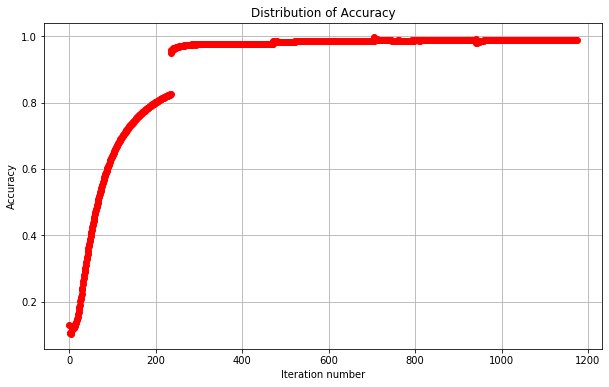

In [58]:
inputs.accuracy()

In [60]:
result = Tester()
result.test(model, test_loader)

tested: 256/10000
loss is 0.029910005629062653 
acc is 0.98828125 

tested: 2048/10000
loss is 0.051838114857673645 
acc is 0.9833984375 

tested: 3840/10000
loss is 0.05697105824947357 
acc is 0.9841145833333333 

tested: 5632/10000
loss is 0.001963285729289055 
acc is 0.9849076704545454 

tested: 7424/10000
loss is 0.004537742584943771 
acc is 0.9870689655172413 

tested: 9216/10000
loss is 0.0006924308836460114 
acc is 0.9894748263888888 

Total acc is 0.9896


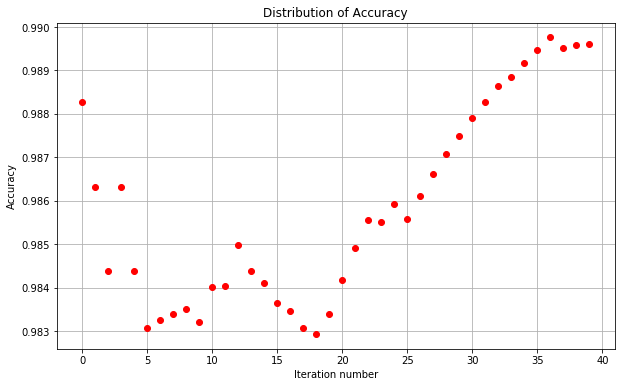

In [63]:
result.accuracy()

In [64]:
inputs.save()  # save the parameters

4


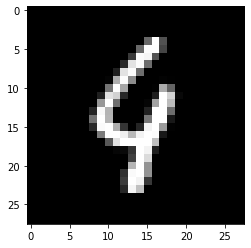

In [65]:
data, label = test_dataset[115]
x = data.view(28,28)
plt.imshow(x, cmap='gray')
print(label)

In [66]:
# 提取中间层结果
class Layer_Hook:
    count=0
    def __init__(self, layer):
        for module in layer.modules():
            if isinstance(module, nn.Conv2d):
                self.count = module.out_channels
        self.hook = layer.register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.features = output
    
    def remove(self):
        self.hook.remove()

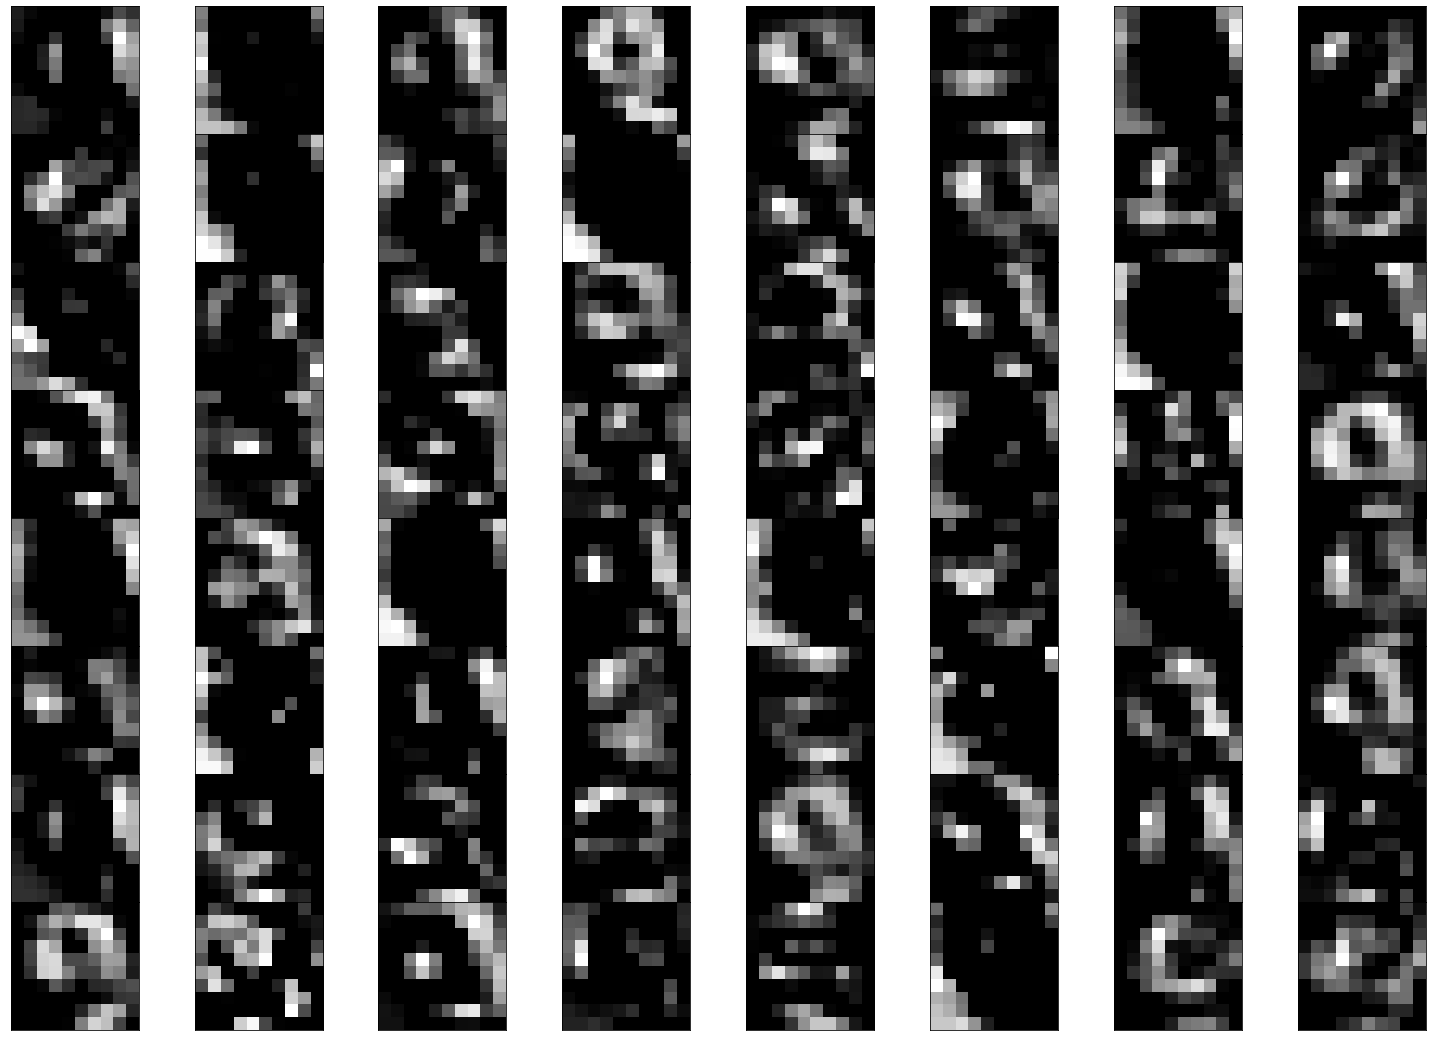

In [67]:
conv_out = Layer_Hook(model.layer3)
img, label = test_dataset[151]
label = torch.from_numpy(np.array(label))   # load the testing data
img = img.view(1,1,28,28)    
out = model(img.to(device))
conv_out.remove()
act = conv_out.features
num = conv_out.count
cols = 8

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
for i in range(num):
    ax = fig.add_subplot(int(num/cols)+1, cols, i+1, xticks=[], yticks=[])
    ax.imshow(act[0][i].cpu().detach().numpy(), cmap='gray')